In [21]:
from src.Distributions import *
from collections import Counter
from multiprocessing import Pool
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import matplotlib.lines as mlines
mpl.rcParams['axes.linewidth'] = 1.4 #set the value globally

In [22]:
alpha_a_v = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
alpha_g_f = 2.0

alpha_a_f = 2.0
alpha_g_v = [1.0, 2.0, 3.0, 4.0, 5.0]

N = 10**5
dim = [1,2,3,4]

In [3]:
# Generate .npy with all degree and distances values from gml.gz files
for d in dim:
    for aa in alpha_a_v:
        print(f"N = {N}, dim = {d}, alpha_a = {aa}, alpha_g = {alpha_g_f}")
        degree_file(N, d, aa, alpha_g_f)
        distance_file(N, d, aa, alpha_g_f)
    print("-----------------")
    for ag in alpha_g_v:
        print(f"N = {N}, dim = {d}, alpha_a = {alpha_a_f}, alpha_g = {ag}")
        degree_file(N, d, alpha_a_f, ag)
        distance_file(N, d, alpha_a_f, ag)

N = 100000, dim = 1, alpha_a = 0.0, alpha_g = 2.0
Folder empty
Folder empty
N = 100000, dim = 1, alpha_a = 1.0, alpha_g = 2.0
Folder empty
Folder empty
N = 100000, dim = 1, alpha_a = 2.0, alpha_g = 2.0
Folder empty
Folder empty
N = 100000, dim = 1, alpha_a = 3.0, alpha_g = 2.0
Folder empty
Folder empty
N = 100000, dim = 1, alpha_a = 4.0, alpha_g = 2.0
Folder empty
Folder empty
N = 100000, dim = 1, alpha_a = 5.0, alpha_g = 2.0
Folder empty
Folder empty
N = 100000, dim = 1, alpha_a = 6.0, alpha_g = 2.0
Folder empty
Folder empty
N = 100000, dim = 1, alpha_a = 7.0, alpha_g = 2.0
Folder empty
Folder empty
N = 100000, dim = 1, alpha_a = 8.0, alpha_g = 2.0
Folder empty
Folder empty
-----------------
N = 100000, dim = 1, alpha_a = 2.0, alpha_g = 1.0
Folder empty
Folder empty
N = 100000, dim = 1, alpha_a = 2.0, alpha_g = 2.0
Folder empty
Folder empty
N = 100000, dim = 1, alpha_a = 2.0, alpha_g = 3.0
Folder empty
Folder empty
N = 100000, dim = 1, alpha_a = 2.0, alpha_g = 4.0
Folder empty
Folder 

In [4]:
# Delete all gml files after processing distances and degrees
folder = "../../data"
delete_files_in_gml_folders(folder)

Removendo arquivos dentro da pasta: ../../data/N_160000/dim_1/alpha_a_1.50_alpha_g_2.00/gml
Removendo arquivos dentro da pasta: ../../data/N_160000/dim_1/alpha_a_1.20_alpha_g_2.00/gml
Removendo arquivos dentro da pasta: ../../data/N_160000/dim_1/alpha_a_2.75_alpha_g_2.00/gml
Removendo arquivos dentro da pasta: ../../data/N_160000/dim_1/alpha_a_2.50_alpha_g_2.00/gml
Removendo arquivos dentro da pasta: ../../data/N_160000/dim_1/alpha_a_5.25_alpha_g_2.00/gml
Removendo arquivos dentro da pasta: ../../data/N_160000/dim_1/alpha_a_8.20_alpha_g_2.00/gml
Removendo arquivos dentro da pasta: ../../data/N_160000/dim_1/alpha_a_5.50_alpha_g_2.00/gml
Removendo arquivos dentro da pasta: ../../data/N_160000/dim_1/alpha_a_6.25_alpha_g_2.00/gml
Removendo arquivos dentro da pasta: ../../data/N_160000/dim_1/alpha_a_3.20_alpha_g_2.00/gml
Removendo arquivos dentro da pasta: ../../data/N_160000/dim_1/alpha_a_8.75_alpha_g_2.00/gml
Removendo arquivos dentro da pasta: ../../data/N_160000/dim_1/alpha_a_4.75_alpha

In [5]:
# Generate .npy with all degree values from gml.gz files
bin_count = 80
for d in dim:
    for aa in alpha_a_v:
        # Generate log_binning file to distances and degree
        print(f"N = {N}, dim = {d}, alpha_a = {aa}, alpha_g = {alpha_g_f}")
        dados = np.load(f"../../data/N_{N}/dim_{d}/alpha_a_{aa:.2f}_alpha_g_{alpha_g_f:.2f}/distances.npy")  # Shape (n_arquivos, n_linhas)
        dados_flat = dados.flatten()
        log_binning(Counter(dados_flat), bin_count, save=True, N=N, dim=d, alpha_a=aa, alpha_g=alpha_g_f, propertie="distances")
        
        dados = np.load(f"../../data/N_{N}/dim_{d}/alpha_a_{aa:.2f}_alpha_g_{alpha_g_f:.2f}/degree.npy")  # Shape (n_arquivos, n_linhas)
        dados_flat = dados.flatten()
        log_binning(Counter(dados_flat), bin_count, save=True, N=N, dim=d, alpha_a=aa, alpha_g=alpha_g_f, propertie="degree")

        # Generate linear binning to degree
        distribution(dados_flat, save=True, N=N, dim=d, alpha_a=aa, alpha_g=alpha_g_f, propertie="degree")
    
    print("-----------------")
    for ag in alpha_g_v:
        # Generate log_binning file to distances and degree
        print(f"N = {N}, dim = {d}, alpha_a = {alpha_a_f}, alpha_g = {ag}")
        dados = np.load(f"../../data/N_{N}/dim_{d}/alpha_a_{alpha_a_f:.2f}_alpha_g_{ag:.2f}/distances.npy")  # Shape (n_arquivos, n_linhas)
        dados_flat = dados.flatten()
        log_binning(Counter(dados_flat), bin_count, save=True, N=N, dim=d, alpha_a=alpha_a_f, alpha_g=ag, propertie="distances")
        
        dados = np.load(f"../../data/N_{N}/dim_{d}/alpha_a_{alpha_a_f:.2f}_alpha_g_{ag:.2f}/degree.npy")  # Shape (n_arquivos, n_linhas)
        dados_flat = dados.flatten()
        log_binning(Counter(dados_flat), bin_count, save=True, N=N, dim=d, alpha_a=alpha_a_f, alpha_g=ag, propertie="degree")

        # Generate linear binning to degree
        distribution(dados_flat, save=True, N=N, dim=d, alpha_a=alpha_a_f, alpha_g=ag, propertie="degree")

N = 100000, dim = 1, alpha_a = 0.0, alpha_g = 2.0
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_0.00_alpha_g_2.00/distances_distribution_log.csv
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_0.00_alpha_g_2.00/degree_distribution_log.csv
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_0.00_alpha_g_2.00/degree_distribution_linear.csv
N = 100000, dim = 1, alpha_a = 1.0, alpha_g = 2.0
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_1.00_alpha_g_2.00/distances_distribution_log.csv
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_1.00_alpha_g_2.00/degree_distribution_log.csv
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_1.00_alpha_g_2.00/degree_distribution_linear.csv
N = 100000, dim = 1, alpha_a = 2.0, alpha_g = 2.0
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_2.00_alpha_g_2.00/distances_distribution_log.csv
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_2.00_alpha_g_2.00/degree_distribution_log.csv
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_2.00_alp

KeyboardInterrupt: 

In [23]:
k_1d_g, pk_1d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_2d_g, pk_2d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_3d_g, pk_3d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_4d_g, pk_4d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]

k_1d_a, pk_1d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_2d_a, pk_2d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_3d_a, pk_3d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_4d_a, pk_4d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]

In [24]:
for i in range(len(alpha_g_v)):
    df_1d = pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_a_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/degree_distribution_linear.csv", delimiter=' ')
    df_2d = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_a_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/degree_distribution_linear.csv", delimiter=' ')
    df_3d = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_a_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/degree_distribution_linear.csv", delimiter=' ')
    df_4d = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_a_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/degree_distribution_linear.csv", delimiter=' ')
    
    k_1d_g[i], pk_1d_g[i] = df_1d["k"], df_1d["pk"]
    k_2d_g[i], pk_2d_g[i] = df_2d["k"], df_2d["pk"]
    k_3d_g[i], pk_3d_g[i] = df_3d["k"], df_3d["pk"]
    k_4d_g[i], pk_4d_g[i] = df_4d["k"], df_4d["pk"]

for i in range(len(alpha_a_v)):
        df_1d = pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_g_f:.2f}/degree_distribution_linear.csv", delimiter=' ')
        df_2d = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_g_f:.2f}/degree_distribution_linear.csv", delimiter=' ')
        df_3d = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_g_f:.2f}/degree_distribution_linear.csv", delimiter=' ')
        df_4d = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_g_f:.2f}/degree_distribution_linear.csv", delimiter=' ')

        k_1d_a[i], pk_1d_a[i] = df_1d["k"], df_1d["pk"]
        k_2d_a[i], pk_2d_a[i] = df_2d["k"], df_2d["pk"]
        k_3d_a[i], pk_3d_a[i] = df_3d["k"], df_3d["pk"]
        k_4d_a[i], pk_4d_a[i] = df_4d["k"], df_4d["pk"]

In [25]:
k_1d_g_log, pk_1d_g_log = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_2d_g_log, pk_2d_g_log = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_3d_g_log, pk_3d_g_log = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_4d_g_log, pk_4d_g_log = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]

k_1d_a_log, pk_1d_a_log = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_2d_a_log, pk_2d_a_log = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_3d_a_log, pk_3d_a_log = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_4d_a_log, pk_4d_a_log = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]

In [26]:
for i in range(len(alpha_g_v)):
    df_1d = pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_a_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/degree_distribution_log.csv", delimiter=' ')
    df_2d = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_a_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/degree_distribution_log.csv", delimiter=' ')
    df_3d = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_a_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/degree_distribution_log.csv", delimiter=' ')
    df_4d = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_a_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/degree_distribution_log.csv", delimiter=' ')
    
    k_1d_g_log[i], pk_1d_g_log[i] = df_1d["k"], df_1d["pk"]
    k_2d_g_log[i], pk_2d_g_log[i] = df_2d["k"], df_2d["pk"]
    k_3d_g_log[i], pk_3d_g_log[i] = df_3d["k"], df_3d["pk"]
    k_4d_g_log[i], pk_4d_g_log[i] = df_4d["k"], df_4d["pk"]

for i in range(len(alpha_a_v)):
    df_1d = pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_g_f:.2f}/degree_distribution_log.csv", delimiter=' ')
    df_2d = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_g_f:.2f}/degree_distribution_log.csv", delimiter=' ')
    df_3d = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_a_f:.2f}/degree_distribution_log.csv", delimiter=' ')
    df_4d = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_a_f:.2f}/degree_distribution_log.csv", delimiter=' ')
    
    k_1d_a_log[i], pk_1d_a_log[i] = df_1d["k"], df_1d["pk"]
    k_2d_a_log[i], pk_2d_a_log[i] = df_2d["k"], df_2d["pk"]
    k_3d_a_log[i], pk_3d_a_log[i] = df_3d["k"], df_3d["pk"]
    k_4d_a_log[i], pk_4d_a_log[i] = df_4d["k"], df_4d["pk"]


In [7]:
# # The adjustment will be done only in the pk region in the interval [10⁻⁶, 1], filtering pk values ​​in this interval
# k_filtered = []
# pk_filtered = []
# threshold = 1e-6  # Definição do limite mínimo

# for k_sublist, pk_sublist in zip(k_1d_g, pk_1d_g):
#     # Filtra os valores mantendo a relação 1:1
#     filtered_pairs = [(ki, pki) for ki, pki in zip(k_sublist, pk_sublist) if pki >= threshold]
    
#     # Separa novamente em listas individuais
#     if filtered_pairs:
#         k_filtered.append([ki for ki, pki in filtered_pairs])
#         pk_filtered.append([pki for ki, pki in filtered_pairs])
#     else:
#         k_filtered.append([])  # Mantém a estrutura original
#         pk_filtered.append([])

#print(q(alpha_a_v[2],1))
#for v in range(len(alpha_g_v)):
v = 0
k, pk = k_filtered[v], pk_filtered[v]

#q,err_q, b, err_b = bootstrap_q_exp(k, pk, n_bootstrap=10000)

#Q, B = optimize_q_exp(k, pk, q_initial=q(2.0,1), b_initial=eta(2.0,1), delta_q=0.01, delta_b=0.01)

#print(Q, B)
markersize = 9
plt.plot(k, pk,'o', ms=markersize)
plt.plot(k, q_exp(k, q,b))
plt.xscale("log")
plt.yscale("log")
plt.ylim([10**(-6),1])
#plt.savefig("result_new.pdf")
plt.show()

NameError: name 'k_filtered' is not defined

In [27]:
q_1d, err_1d_q, b_1d, err_1d_b = bootstrap_q_exp(k_1d_g_log, pk_1d_g_log, dim = 1, alpha_a=2.0, n_bootstrap=10000)
q_2d, err_2d_q ,b_2d, err_2d_b = bootstrap_q_exp(k_2d_g_log, pk_2d_g_log, dim = 2, alpha_a=2.0, n_bootstrap=10000)
q_3d, err_3d_q, b_3d, err_3d_b = bootstrap_q_exp(k_3d_g_log, pk_3d_g_log, dim = 3, alpha_a=2.0, n_bootstrap=10000)
q_4d, err_4d_q, b_4d, err_4d_b = bootstrap_q_exp(k_4d_g_log, pk_4d_g_log, dim = 4, alpha_a=2.0, n_bootstrap=10000)

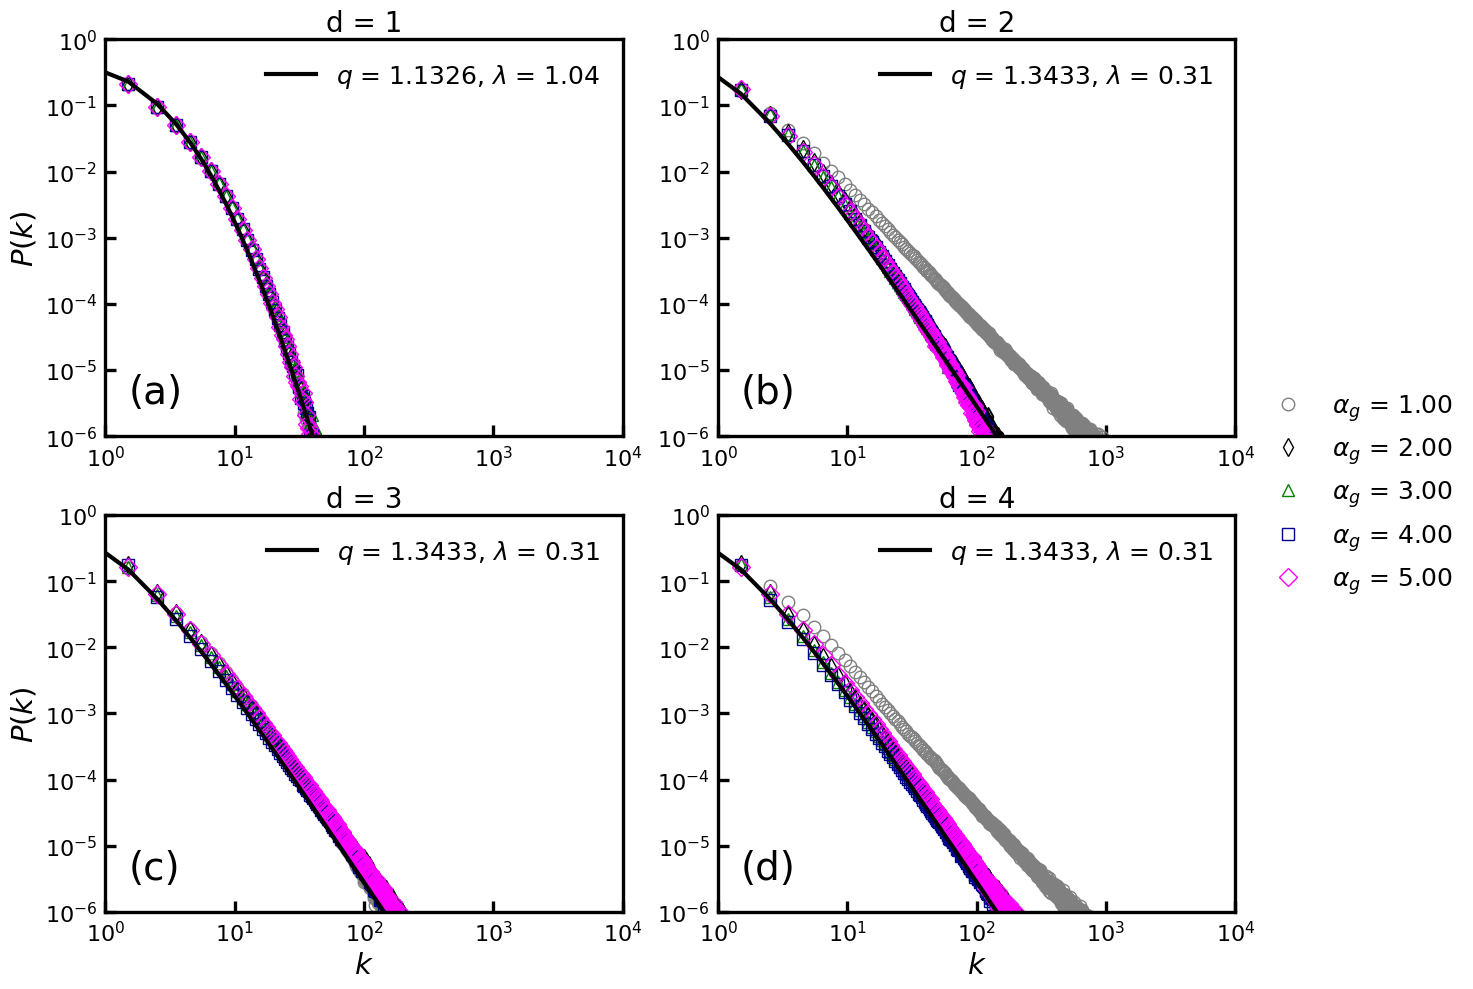

In [28]:
color = ["#808080","black",'#008000',"#00008B","magenta","darkgoldenrod"]

labels_1 = [rf"$\alpha_g$ = {i:.2f}" for i in alpha_g_v]

markers = ["o","d","^","s","D"]
titles = [f"d = {d}" for d in dim]
markersize = 9

labels_global = [rf"$\alpha_g$ = {alpha_g_v[i]:.2f}" for i in range(len(alpha_g_v))]


fig, ax = plt.subplots(2, 2,figsize=(15,10))
#fig.suptitle(r'Distribuição de graus da rede para múltiplos $\alpha_g$', fontsize=20)
for i in range(len(alpha_g_v)):
    # Plot data
    ax[0, 0].plot(k_1d_g[i], pk_1d_g[i],markers[i],color=color[i],markersize=markersize,markerfacecolor='none')
    ax[0, 1].plot(k_2d_g[i], pk_2d_g[i],markers[i],color=color[i],markersize=markersize,markerfacecolor='none')
    ax[1, 0].plot(k_3d_g[i], pk_3d_g[i],markers[i],color=color[i],markersize=markersize,markerfacecolor='none')
    ax[1, 1].plot(k_4d_g[i], pk_4d_g[i],markers[i],color=color[i],markersize=markersize,markerfacecolor='none')
 
label_1d, label_2d = f'$q$ = {q_1d:.4f}, $\\lambda$ = {b_1d:.2f}', f'$q$ = {q_2d:.4f}, $\\lambda$ = {b_2d:.2f}'
label_3d, label_4d = f'$q$ = {q_3d:.4f}, $\\lambda$ = {b_3d:.2f}', f'$q$ = {q_4d:.4f}, $\\lambda$ = {b_4d:.2f}'

ax[0, 0].plot(k_1d_g[1],q_exp(k_1d_g[1], q_1d, b_1d), label = label_1d, color="k", linewidth = 3.0)
ax[0, 1].plot(k_2d_g[1],q_exp(k_2d_g[1], q_2d, b_2d), label = label_2d, color="k", linewidth = 3.0)
ax[1, 0].plot(k_3d_g[1],q_exp(k_3d_g[1], q_3d, b_3d), label = label_3d, color="k", linewidth = 3.0)
ax[1, 1].plot(k_4d_g[1],q_exp(k_4d_g[1], q_4d, b_4d), label = label_4d, color="k", linewidth = 3.0)

# Dimension Values
# ax[0, 0].text(1.5, 10**(-5.5), f'$d = 1$', style="normal" ,fontsize=17, bbox={'facecolor': color[0], 'alpha': 0.2, 'pad': 11})
# ax[0, 1].text(1.5, 10**(-5.5), f'$d = 2$', style="normal" ,fontsize=17, bbox={'facecolor': color[1], 'alpha': 0.2, 'pad': 11})
# ax[1, 0].text(1.5, 10**(-5.5), f'$d = 3$', style="normal" ,fontsize=17, bbox={'facecolor': color[2], 'alpha': 0.2, 'pad': 11})
# ax[1, 1].text(1.5, 10**(-5.5), f'$d = 4$', style="normal" ,fontsize=17, bbox={'facecolor': color[3], 'alpha': 0.2, 'pad': 11})


# ax[0, 0].text(1.5, 10**(-4.4), "(a)", style="normal" ,fontsize=25)
# ax[0, 1].text(1.5, 10**(-4.4), "(b)", style="normal" ,fontsize=25)
# ax[1, 0].text(1.5, 10**(-4.4), "(c)", style="normal" ,fontsize=25)
# ax[1, 1].text(1.5, 10**(-4.4), "(d)", style="normal" ,fontsize=25)

ax[0, 0].text(1.5, 10**(-5.5), "(a)", style="normal" ,fontsize=28)
ax[0, 1].text(1.5, 10**(-5.5), "(b)", style="normal" ,fontsize=28)
ax[1, 0].text(1.5, 10**(-5.5), "(c)", style="normal" ,fontsize=28)
ax[1, 1].text(1.5, 10**(-5.5), "(d)", style="normal" ,fontsize=28)


# ax[0, 0].text(10**2.3, 10**(-5.5), f'$q$ = {q_1d:.3f}, $\\lambda$ = {b_1d:.3f}', style="normal" ,fontsize=20)
# ax[0, 1].text(10**2.3, 10**(-5.5), f'$q$ = {q_2d:.3f}, $\\lambda$ = {b_2d:.3f}', style="normal" ,fontsize=20)
# ax[1, 0].text(10**2.3, 10**(-5.5), f'$q$ = {q_3d:.3f}, $\\lambda$ = {b_3d:.3f}', style="normal" ,fontsize=20)
# ax[1, 1].text(10**2.3, 10**(-5.5), f'$q$ = {q_4d:.3f}, $\\lambda$ = {b_4d:.3f}', style="normal" ,fontsize=20)
# ax[1, 1].text(230.5, 10**(-5.5), f'$q$ = {round(q(2.0, 4),2)}, $\lambda$ = {round(1/eta(2.0, 4),2)}', style="normal" ,fontsize=16)

# Criando proxies para a legenda global (α_a)
proxy_handles = [plt.Line2D([], [], color=color[i], marker=markers[i], linestyle='None', markersize=markersize, markerfacecolor='none') for i in range(len(alpha_g_v))]

# Adicionando legenda compartilhada global na lateral direita
fig.legend(proxy_handles, labels_global, loc="center left", bbox_to_anchor=(0.83, 0.5), fontsize=18, frameon=False)

thickness_axes =  2.4
parts_of_graphic = ['top', 'bottom', 'left', 'right']
for i in range(2):
    for j in range(2):
        ax[i, j].set_xlim([1,10**4])
        ax[i, j].set_ylim([10**(-6),1])
        ax[i, j].set_title(titles[i*2+j], fontsize=20)
        ax[i, j].set_yscale('log')
        ax[i, j].set_xscale('log')
        ax[i, j].legend(prop={"size":18},fancybox=True,framealpha=0.0)
        ax[i, 0].set_ylabel(r"$P(k)$",size=21)
        ax[1, j].set_xlabel(r"$k$",size=21)
        ax[i, j].xaxis.set_minor_locator(plt.NullLocator())
        ax[i, j].yaxis.set_minor_locator(plt.NullLocator())
        #ax[i, j].tick_params('both', labelsize=21)
        #ax[i,j].tick_params(which='minor', width=1.4,length=4,labelsize=18)
        for k in parts_of_graphic:
            ax[i, j].spines[k].set_linewidth(thickness_axes)
        ax[i,j].tick_params(which='major', width=thickness_axes,direction="in",length=8, labelsize=16, pad=6.0)
#fig.suptitle(r'Distribuição de graus para múltiplos $\alpha_g$', fontsize=30)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("../../results/distributions/degree_alpha_g.pdf",dpi=300)
plt.show()

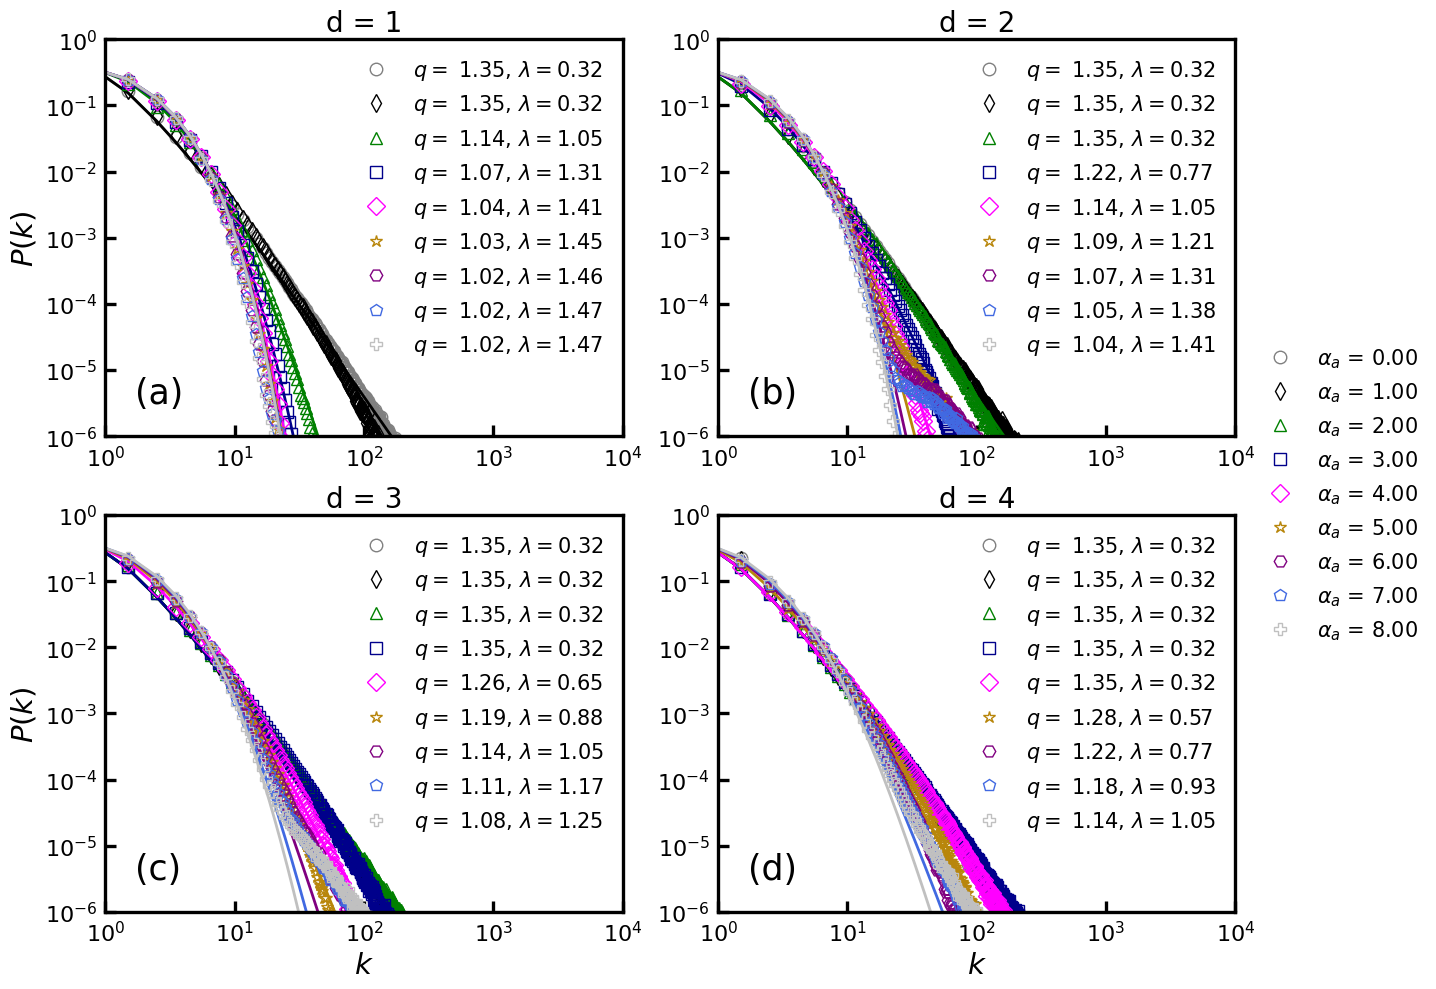

In [29]:
Q_1d, B_1d = [], []
Q_2d, B_2d = [], []
Q_3d, B_3d = [], []
Q_4d, B_4d = [], []

for i in range(len(alpha_a_v)):
    q_1d, b_1d = optimize_q_exp(k_1d_a_log[i], k_1d_a_log[i], q_initial=q(alpha_a_v[i], 1), b_initial=eta(alpha_a_v[i], 1), delta_q=0.01, delta_b=0.01)
    q_2d, b_2d = optimize_q_exp(k_2d_a_log[i], k_2d_a_log[i], q_initial=q(alpha_a_v[i], 2), b_initial=eta(alpha_a_v[i], 2), delta_q=0.01, delta_b=0.01)
    q_3d, b_3d = optimize_q_exp(k_3d_a_log[i], k_3d_a_log[i], q_initial=q(alpha_a_v[i], 3), b_initial=eta(alpha_a_v[i], 3), delta_q=0.01, delta_b=0.01)
    q_4d, b_4d = optimize_q_exp(k_4d_a_log[i], k_4d_a_log[i], q_initial=q(alpha_a_v[i], 4), b_initial=eta(alpha_a_v[i], 4), delta_q=0.01, delta_b=0.01)

    Q_1d.append(float(q_1d))
    Q_2d.append(float(q_2d))
    Q_3d.append(float(q_3d))
    Q_4d.append(float(q_4d))
    
    B_1d.append(float(b_1d))
    B_2d.append(float(b_2d))
    B_3d.append(float(b_3d))
    B_4d.append(float(b_4d))

color = ["#808080","black",'#008000',"#00008B","magenta","darkgoldenrod","purple","royalblue", "silver"]

markers = ["o","d","^","s","D","*","H","p","P"]

labels_global = [rf"$\alpha_a$ = {alpha_a_v[i]:.2f}" for i in range(len(alpha_a_v))]

markersize = 9
fig, ax = plt.subplots(2, 2,figsize=(15,10))
#fig.suptitle(r'Distribuição de graus da rede para múltiplos $\alpha_g$', fontsize=20)
for i in range(len(alpha_a_v)):    
    qq_1d, bb_1d = optimize_q_exp(k_1d_a_log[i], k_1d_a_log[i], q_initial=Q_1d[i], b_initial=B_1d[i], delta_q=0.01, delta_b=0.01)
    qq_2d, bb_2d = optimize_q_exp(k_2d_a_log[i], k_2d_a_log[i], q_initial=Q_2d[i], b_initial=B_2d[i], delta_q=0.01, delta_b=0.01)
    qq_3d, bb_3d = optimize_q_exp(k_3d_a_log[i], k_3d_a_log[i], q_initial=Q_3d[i], b_initial=B_3d[i], delta_q=0.01, delta_b=0.01)
    qq_4d, bb_4d = optimize_q_exp(k_4d_a_log[i], k_4d_a_log[i], q_initial=Q_4d[i], b_initial=B_4d[i], delta_q=0.01, delta_b=0.01)
    
    # Plot data
    ax[0, 0].plot(k_1d_a[i], pk_1d_a[i],markers[i],color=color[i],label=rf'$q =$ {qq_1d:.2f}, $\lambda = {bb_1d:.2f}$',markersize=markersize,markerfacecolor='none')
    ax[0, 1].plot(k_2d_a[i], pk_2d_a[i],markers[i],color=color[i],label=rf'$q =$ {qq_2d:.2f}, $\lambda = {bb_2d:.2f}$',markersize=markersize,markerfacecolor='none')
    ax[1, 0].plot(k_3d_a[i], pk_3d_a[i],markers[i],color=color[i],label=rf'$q =$ {qq_3d:.2f}, $\lambda = {bb_3d:.2f}$',markersize=markersize,markerfacecolor='none')
    ax[1, 1].plot(k_4d_a[i], pk_4d_a[i],markers[i],color=color[i],label=rf'$q =$ {qq_4d:.2f}, $\lambda = {bb_4d:.2f}$',markersize=markersize,markerfacecolor='none')
    
    ax[0, 0].plot(k_1d_a[i], q_exp(k_1d_a[i], qq_1d, bb_1d), color=color[i], linewidth=2.0)
    ax[0, 1].plot(k_2d_a[i], q_exp(k_2d_a[i], qq_2d, bb_2d), color=color[i], linewidth=2.0)
    ax[1, 0].plot(k_3d_a[i], q_exp(k_3d_a[i], qq_3d, bb_3d), color=color[i], linewidth=2.0)
    ax[1, 1].plot(k_4d_a[i], q_exp(k_4d_a[i], qq_4d, bb_4d), color=color[i], linewidth=2.0)

        
# ax[0, 0].plot(k_1d_a[0],q_exp(k_1d_a[0], Q_1d, B_1d), color='red', label = r"$P(0)e_q^{-k/\lambda}$", linewidth=2.4)
# ax[0, 1].plot(k_2d_a[0],q_exp(k_2d_a[0], Q_2d, B_2d), color='red', label = r"$P(0)e_q^{-k/\lambda}$", linewidth=2.4)
# ax[1, 0].plot(k_3d_a[0],q_exp(k_3d_a[0], Q_3d, B_3d), color='red', label = r"$P(0)e_q^{-k/\lambda}$", linewidth=2.4)
# ax[1, 1].plot(k_4d_a[0],q_exp(k_4d_a[0], Q_4d, B_4d), color='red', label = r"$P(0)e_q^{-k/\lambda}$", linewidth=2.4)

# Dimension Values
# ax[0, 0].text(1.7, 10**(-5.5), f'$d = 1$', style="normal" ,fontsize=17, bbox={'facecolor': color[0], 'alpha': 0.2, 'pad': 11})
# ax[0, 1].text(1.7, 10**(-5.5), f'$d = 2$', style="normal" ,fontsize=17, bbox={'facecolor': color[1], 'alpha': 0.2, 'pad': 11})
# ax[1, 0].text(1.7, 10**(-5.5), f'$d = 3$', style="normal" ,fontsize=17, bbox={'facecolor': color[2], 'alpha': 0.2, 'pad': 11})
# ax[1, 1].text(1.7, 10**(-5.5), f'$d = 4$', style="normal" ,fontsize=17, bbox={'facecolor': color[3], 'alpha': 0.2, 'pad': 11})

ax[0, 0].text(1.7, 10**(-5.5), "(a)", style="normal" ,fontsize=25)
ax[0, 1].text(1.7, 10**(-5.5), "(b)", style="normal" ,fontsize=25)
ax[1, 0].text(1.7, 10**(-5.5), "(c)", style="normal" ,fontsize=25)
ax[1, 1].text(1.7, 10**(-5.5), "(d)", style="normal" ,fontsize=25)
# Criando proxies para a legenda global (α_a)
proxy_handles = [plt.Line2D([], [], color=color[i], marker=markers[i], linestyle='None', markersize=markersize, markerfacecolor='none') for i in range(len(alpha_a_v))]

# Adicionando legenda compartilhada global na lateral direita
fig.legend(proxy_handles, labels_global, loc="center left", bbox_to_anchor=(0.83, 0.5), fontsize=15, frameon=False)

parts_of_graphic = ['top', 'bottom', 'left', 'right']

for i in range(2):
    for j in range(2):
        ax[i, j].set_xlim([1,10**4])
        ax[i, j].set_ylim([10**(-6),1])
        
        ax[i, j].set_yscale('log')
        ax[i, j].set_xscale('log')
        ax[i, j].set_title(titles[i*2+j], fontsize=20)
        ax[i, j].legend(prop={"size":15},fancybox=True,framealpha=0.0)
        ax[i, 0].set_ylabel(r"$P(k)$",size=21)
        ax[1, j].set_xlabel(r"$k$",size=21)
        #ax[i, j].tick_params('both', labelsize=21)
        ax[i, j].xaxis.set_minor_locator(plt.NullLocator())
        ax[i, j].yaxis.set_minor_locator(plt.NullLocator())
        for k in parts_of_graphic:
            ax[i, j].spines[k].set_linewidth(thickness_axes)
        #ax[i,j].tick_params(which='minor', width=1.4,length=4,labelsize=18)
        ax[i,j].tick_params(which='major', width=thickness_axes,direction="in",length=8,labelsize=16, pad=6.0)
#fig.suptitle(r'Distribuição de graus para múltiplos $\alpha_a$', fontsize=30)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("../../results/distributions/degree_alpha_a.pdf",dpi=300)
plt.show()

In [30]:
k_1d_g, pk_1d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_2d_g, pk_2d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_3d_g, pk_3d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_4d_g, pk_4d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]

k_1d_a, pk_1d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_2d_a, pk_2d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_3d_a, pk_3d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_4d_a, pk_4d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]

In [31]:
for i in range(len(alpha_g_v)):
    df_1d = pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_a_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/distances_distribution_log.csv", delimiter=' ')
    df_2d = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_a_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/distances_distribution_log.csv", delimiter=' ')
    df_3d = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_a_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/distances_distribution_log.csv", delimiter=' ')
    df_4d = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_a_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/distances_distribution_log.csv", delimiter=' ')

    k_1d_g[i], pk_1d_g[i] = df_1d["ds"], df_1d["pds"]
    k_2d_g[i], pk_2d_g[i] = df_2d["ds"], df_2d["pds"]
    k_3d_g[i], pk_3d_g[i] = df_3d["ds"], df_3d["pds"]
    k_4d_g[i], pk_4d_g[i] = df_4d["ds"], df_4d["pds"]

In [32]:
for i in range(len(alpha_a_v)):
        df_1d = pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_g_f:.2f}/distances_distribution_log.csv", delimiter=' ')
        df_2d = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_g_f:.2f}/distances_distribution_log.csv", delimiter=' ')
        df_3d = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_g_f:.2f}/distances_distribution_log.csv", delimiter=' ')
        df_4d = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_g_f:.2f}/distances_distribution_log.csv", delimiter=' ')

        k_1d_a[i], pk_1d_a[i] = df_1d["ds"], df_1d["pds"]
        k_2d_a[i], pk_2d_a[i] = df_2d["ds"], df_2d["pds"]
        k_3d_a[i], pk_3d_a[i] = df_3d["ds"], df_3d["pds"]
        k_4d_a[i], pk_4d_a[i] = df_4d["ds"], df_4d["pds"]

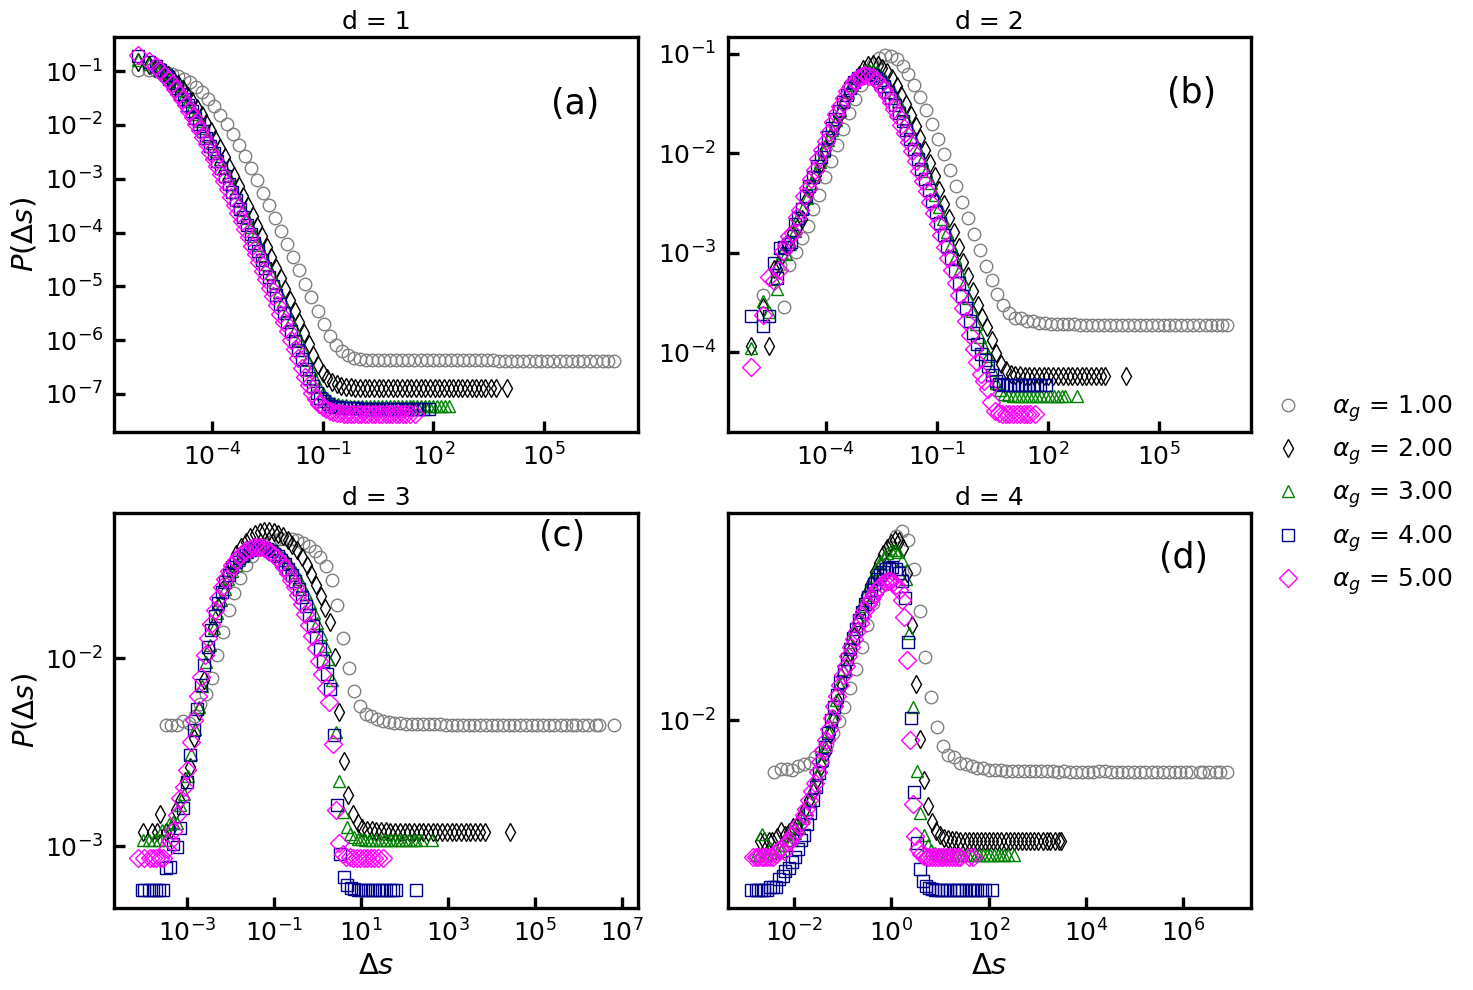

In [33]:
color = ["#808080","black",'#008000',"#00008B","magenta","darkgoldenrod"]
markers = ["o","d","^","s","D"]
#markers = ["o","o","o","o","o"]
labels_global = [rf"$\alpha_g$ = {i:.2f}" for i in alpha_g_v]
markersize = 9
fig, ax = plt.subplots(2, 2,figsize=(15,10))
#fig.suptitle(r'Distribuição de graus da rede para múltiplos $\alpha_g$', fontsize=20)
for i in range(len(alpha_g_v)):
     # Plot data
    ax[0, 0].plot(k_1d_g[i], pk_1d_g[i],markers[i],color=color[i],markersize=markersize,markerfacecolor='none')
    ax[0, 1].plot(k_2d_g[i], pk_2d_g[i],markers[i],color=color[i],markersize=markersize,markerfacecolor='none')
    ax[1, 0].plot(k_3d_g[i], pk_3d_g[i],markers[i],color=color[i],markersize=markersize,markerfacecolor='none')
    ax[1, 1].plot(k_4d_g[i], pk_4d_g[i],markers[i],color=color[i],markersize=markersize,markerfacecolor='none')

thickness_axes =  2.4
parts_of_graphic = ['top', 'bottom', 'left', 'right']
# Criando proxies para a legenda global (α_a)
proxy_handles = [plt.Line2D([], [], color=color[i], marker=markers[i], linestyle='None', markersize=markersize, markerfacecolor='none') for i in range(len(alpha_g_v))]
# Adicionando legenda compartilhada global na lateral direita
fig.legend(proxy_handles, labels_global, loc="center left", bbox_to_anchor=(0.83, 0.5), fontsize=18, frameon=False)

for f, d in zip(ax.flatten(), dim):
    f.set_title(f"d = {d}", fontsize=18)

ax[0, 0].text(10**(5.2), 10**(-1.8), "(a)", style="normal" ,fontsize=25)
ax[0, 1].text(10**(5.2), 10**(-1.5), "(b)", style="normal" ,fontsize=25)
ax[1, 0].text(10**5.1, 10**(-1.4), "(c)", style="normal" ,fontsize=25)
ax[1, 1].text(10**5.5, 10**(-1.3), "(d)", style="normal" ,fontsize=25)


# ax[0, 0].text(10**(5.2), 10**(-2.0), f'$d = 1$', style="normal" ,fontsize=17, bbox={'facecolor': color[0], 'alpha': 0.2, 'pad': 11})
# ax[0, 1].text(10**(5.2), 10**(-1.5), f'$d = 2$', style="normal" ,fontsize=17, bbox={'facecolor': color[1], 'alpha': 0.2, 'pad': 11})
# ax[1, 0].text(10**(5.1), 10**(-1.4), f'$d = 3$', style="normal" ,fontsize=17, bbox={'facecolor': color[2], 'alpha': 0.2, 'pad': 11})
# ax[1, 1].text(10**(5.5), 10**(-1.3), f'$d = 4$', style="normal" ,fontsize=17, bbox={'facecolor': color[3], 'alpha': 0.2, 'pad': 11})

for i in range(2):
    for j in range(2):
        #ax[i, j].set_xlim([1,10**4])
        #ax[i, j].set_ylim([10**(-6),1])
        
        ax[i, j].set_yscale('log')
        ax[i, j].set_xscale('log')
        #ax[i, j].legend(prop={"size":16},fancybox=True,framealpha=0.0)
        ax[i, 0].set_ylabel(r"$P(\Delta s)$",size=21)
        ax[1, j].set_xlabel(r"$\Delta s$",size=21)
        ax[i, j].xaxis.set_minor_locator(plt.NullLocator())
        ax[i, j].yaxis.set_minor_locator(plt.NullLocator())
        #ax[i, j].tick_params('both', labelsize=21)
        #ax[i,j].tick_params(which='minor', width=1.4,length=4,labelsize=18)
        for k in parts_of_graphic:
            ax[i, j].spines[k].set_linewidth(thickness_axes)
        ax[i,j].tick_params(which='major', width=thickness_axes,direction="in",length=8,labelsize=18, pad=8)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("../../results/distributions/distances_alpha_g_N100000.pdf")
plt.show()

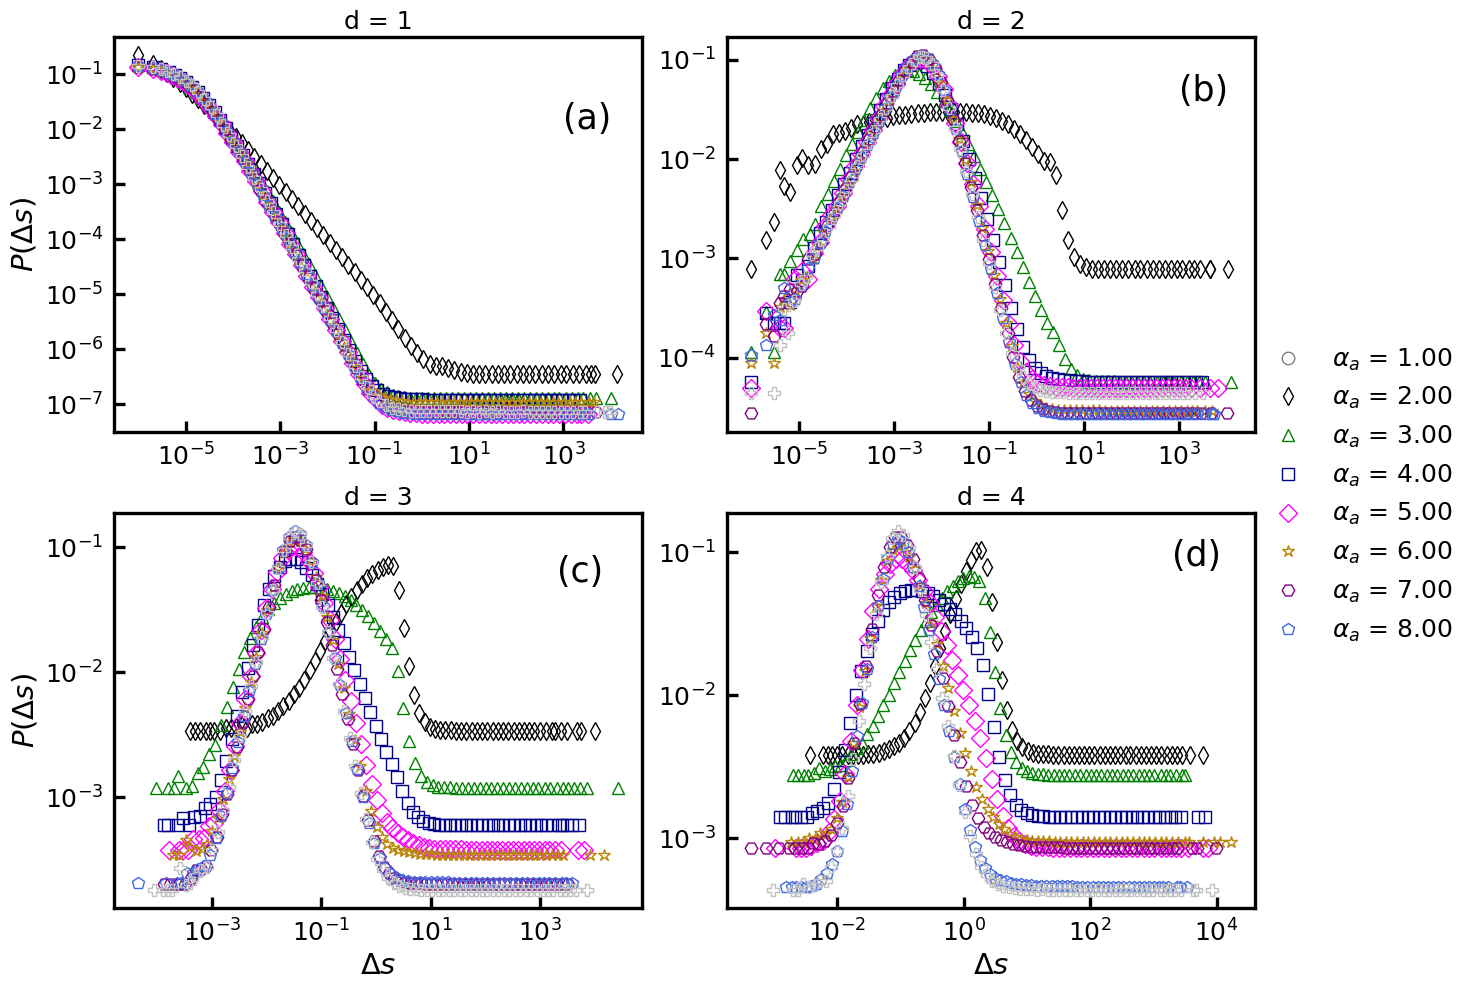

In [34]:
color = ["#808080","black",'#008000',"#00008B","magenta","darkgoldenrod","purple","royalblue", "silver"]

markers = ["o","d","^","s","D","*","H","p","P"]
labels_global = [rf"$\alpha_a$ = {alpha_a_v[i]:.2f}" for i in range(1, len(alpha_a_v))]
#markers = ["o","o","o","o","o"]
labels_1 = [rf"$\alpha_a$ = {alpha_a_v[i]:.2f}" for i in range(1,len(alpha_a_v))]
markersize = 9
fig, ax = plt.subplots(2, 2,figsize=(15,10))
#fig.suptitle(r'Distribuição de graus da rede para múltiplos $\alpha_g$', fontsize=20)
for i in range(1,len(alpha_a_v)):
     # Plot data
    ax[0, 0].plot(k_1d_a[i], pk_1d_a[i],markers[i],color=color[i],markersize=markersize,markerfacecolor='none')
    ax[0, 1].plot(k_2d_a[i], pk_2d_a[i],markers[i],color=color[i],markersize=markersize,markerfacecolor='none')
    ax[1, 0].plot(k_3d_a[i], pk_3d_a[i],markers[i],color=color[i],markersize=markersize,markerfacecolor='none')
    ax[1, 1].plot(k_4d_a[i], pk_4d_a[i],markers[i],color=color[i],markersize=markersize,markerfacecolor='none')

thickness_axes =  2.4
# Criando proxies para a legenda global (α_a)
proxy_handles = [plt.Line2D([], [], color=color[i], marker=markers[i], linestyle='None', markersize=markersize, markerfacecolor='none') for i in range(len(alpha_a_v))]
# Adicionando legenda compartilhada global na lateral direita
fig.legend(proxy_handles, labels_global, loc="center left", bbox_to_anchor=(0.83, 0.5), fontsize=18, frameon=False)

ax[0, 0].text(10**(3), 10**(-2.0), "(a)", style="normal" ,fontsize=25)
ax[0, 1].text(10**(3), 10**(-1.41), "(b)", style="normal" ,fontsize=25)
ax[1, 0].text(10**3.3, 10**(-1.28), "(c)", style="normal" ,fontsize=25)
ax[1, 1].text(10**3.3, 10**(-1.10), "(d)", style="normal" ,fontsize=25)

# ax[0, 0].text(10**(2.8), 10**(-2.0), f'$d = 1$', style="normal" ,fontsize=17, bbox={'facecolor': color[0], 'alpha': 0.2, 'pad': 11})
# ax[0, 1].text(10**(2.8), 10**(-1.41), f'$d = 2$', style="normal" ,fontsize=17, bbox={'facecolor': color[1], 'alpha': 0.2, 'pad': 11})
# ax[1, 0].text(10**(3.2), 10**(-1.28), f'$d = 3$', style="normal" ,fontsize=17, bbox={'facecolor': color[2], 'alpha': 0.2, 'pad': 11})
# ax[1, 1].text(10**(3.2), 10**(-1.10), f'$d = 4$', style="normal" ,fontsize=17, bbox={'facecolor': color[3], 'alpha': 0.2, 'pad': 11})

for f, d in zip(ax.flatten(), dim):
    f.set_title(f"d = {d}", fontsize=18)

parts_of_graphic = ['top', 'bottom', 'left', 'right']
for i in range(2):
    for j in range(2):
        #ax[i, j].set_xlim([1,10**4])
        #ax[i, j].set_ylim([10**(-6),1])
        
        ax[i, j].set_yscale('log')
        ax[i, j].set_xscale('log')
        #ax[i, j].legend(prop={"size":16},fancybox=True,framealpha=0.0)
        ax[i, 0].set_ylabel(r"$P(\Delta s)$",size=21)
        ax[1, j].set_xlabel(r"$\Delta s$",size=21)
        ax[i, j].xaxis.set_minor_locator(plt.NullLocator())
        ax[i, j].yaxis.set_minor_locator(plt.NullLocator())
        #ax[i, j].tick_params('both', labelsize=21)
        #ax[i,j].tick_params(which='minor', width=1.4,length=4,labelsize=18)
        for k in parts_of_graphic:
            ax[i, j].spines[k].set_linewidth(thickness_axes)
        ax[i,j].tick_params(which='major', width=thickness_axes,direction="in",length=8,labelsize=18, pad =8)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("../../results/distributions/distances_alpha_a_N100000.pdf")
plt.show()

[[array([-2.25257345e+01, -2.25257993e+01, -2.25256049e+01, -2.25255564e+01,
       -2.25254592e+01, -2.25252972e+01, -2.25250705e+01, -2.25247466e+01,
       -2.25242770e+01, -2.25235969e+01, -2.25226252e+01, -2.25212163e+01,
       -2.25191597e+01, -2.25161961e+01, -2.25119209e+01, -2.25057185e+01,
       -2.24967470e+01, -2.24837916e+01, -2.24650550e+01, -2.24379460e+01,
       -2.23987238e+01, -2.23420119e+01, -2.22600047e+01, -2.21413825e+01,
       -2.19698217e+01, -2.17216949e+01, -2.13628164e+01, -2.08437777e+01,
       -2.00930979e+01, -1.90073773e+01, -1.74371115e+01, -1.51660601e+01,
       -1.18814493e+01, -7.13107554e+00, -2.62307257e-01,  9.66097188e+00,
        2.39775403e+01,  4.46264019e+01,  7.43664171e+01,  1.17154357e+02,
        1.78767117e+02,  2.67697427e+02])], [array([-26.86753092, -26.86757156, -26.86749028, -26.86757156,
       -26.86740899, -26.86736834, -26.86730738, -26.86720577,
       -26.86706351, -26.86688061, -26.86665707, -26.86635224,
       -26.865

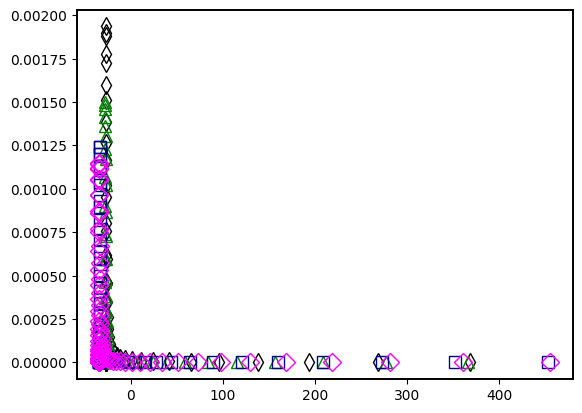

In [ ]:
x_norm = [[] for _ in range(len(alpha_g_v))]
y_norm = [[] for _ in range(len(alpha_g_v))]

for i in range(len(alpha_g_v)):
    k_filt = [k for k, pk in zip(k_2d_g[i], pk_2d_g[i]) if min(k_2d_g[i]) <= k <= 10**1]
    pk_filt = [pk for k, pk in zip(k_2d_g[i], pk_2d_g[i]) if min(k_2d_g[i]) <= k <= 10**1]
    x, y = np.array(k_filt), np.array(pk_filt)
    x_mean, y_std = x.mean(), y.std()
    x_new = (x - x_mean)/y_std
    y_new = y_std*y
    
    x_norm[i].append(x_new)
    y_norm[i].append(y_new)

for i in range(1,len(alpha_g_v)):
     # Plot data
    plt.plot(x_norm[i], y_norm[i], markers[i],color=color[i],markersize=markersize,markerfacecolor='none')
print(x_norm)
#plt.xscale("log")
#plt.yscale("log")

plt.show()
    

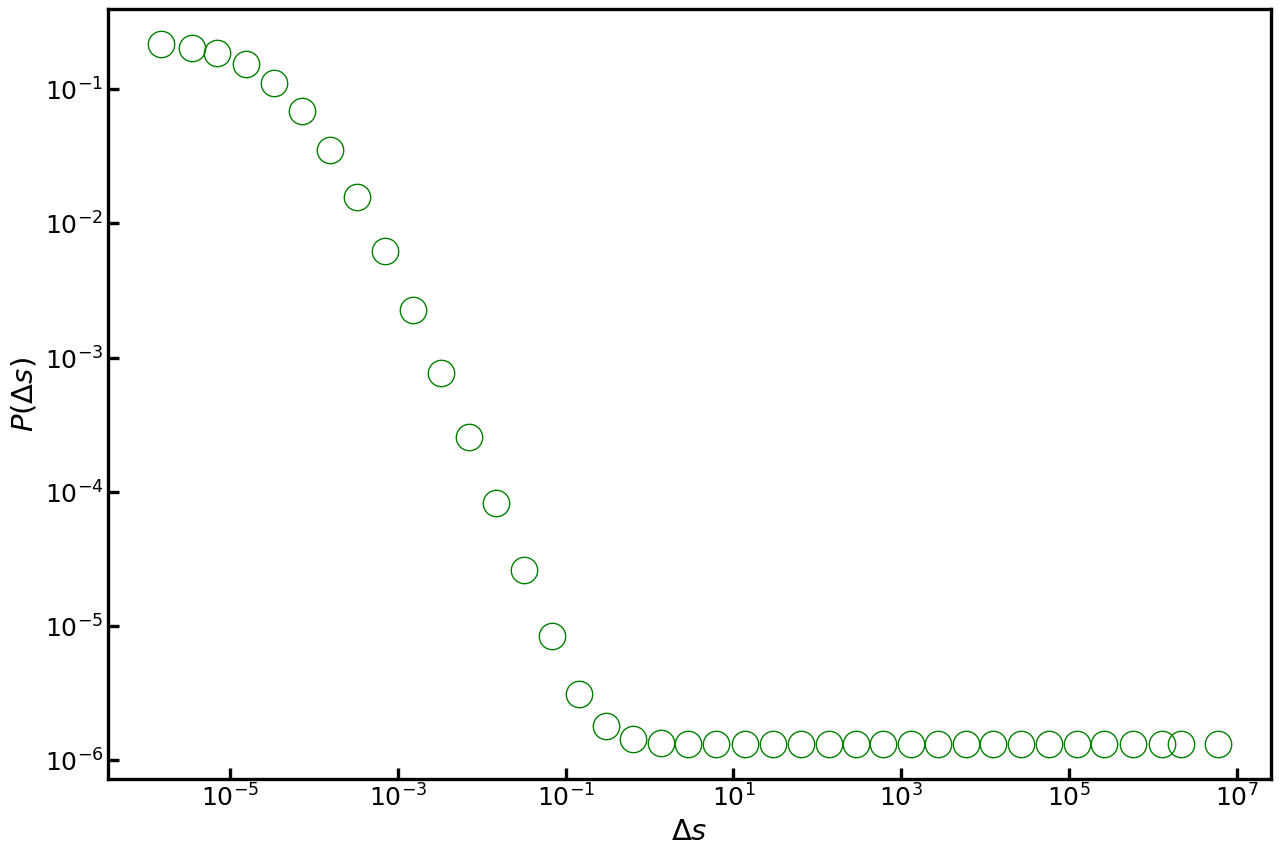

In [ ]:
color = ["#808080","black",'#008000',"#00008B","magenta","darkgoldenrod"]
markers = ["o","d","^","s","D"]
#markers = ["o","o","o","o","o"]
labels_global = [rf"$\alpha_g$ = {i:.2f}" for i in alpha_g_v]
markersize = 19
fig, ax = plt.subplots(figsize=(15,10))
#fig.suptitle(r'Distribuição de graus da rede para múltiplos $\alpha_g$', fontsize=20)
ax.plot(k_1d_g[0], pk_1d_g[0],markers[0],color=color[2],markersize=markersize,markerfacecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')
#ax.legend(prop={"size":16},fancybox=True,framealpha=0.0)
ax.set_ylabel(r"$P(\Delta s)$",size=21)
ax.set_xlabel(r"$\Delta s$",size=21)
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.yaxis.set_minor_locator(plt.NullLocator())
#ax.tick_params('both', labelsize=21)
#ax[i,j].tick_params(which='minor', width=1.4,length=4,labelsize=18)
for k in parts_of_graphic:
    ax.spines[k].set_linewidth(thickness_axes)
ax.tick_params(which='major', width=thickness_axes,direction="in",length=8,labelsize=18)
plt.show()

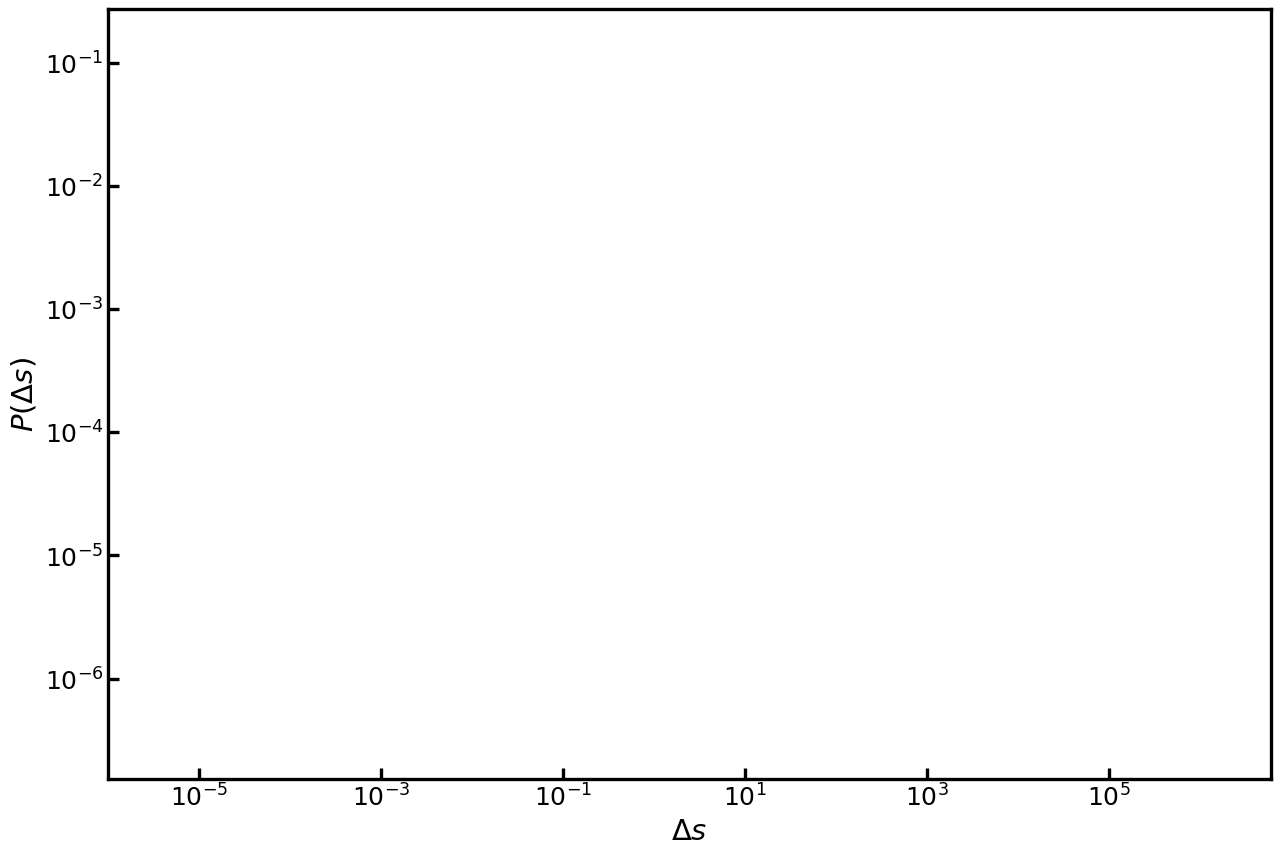

/home/junior/.local/lib/python3.12/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


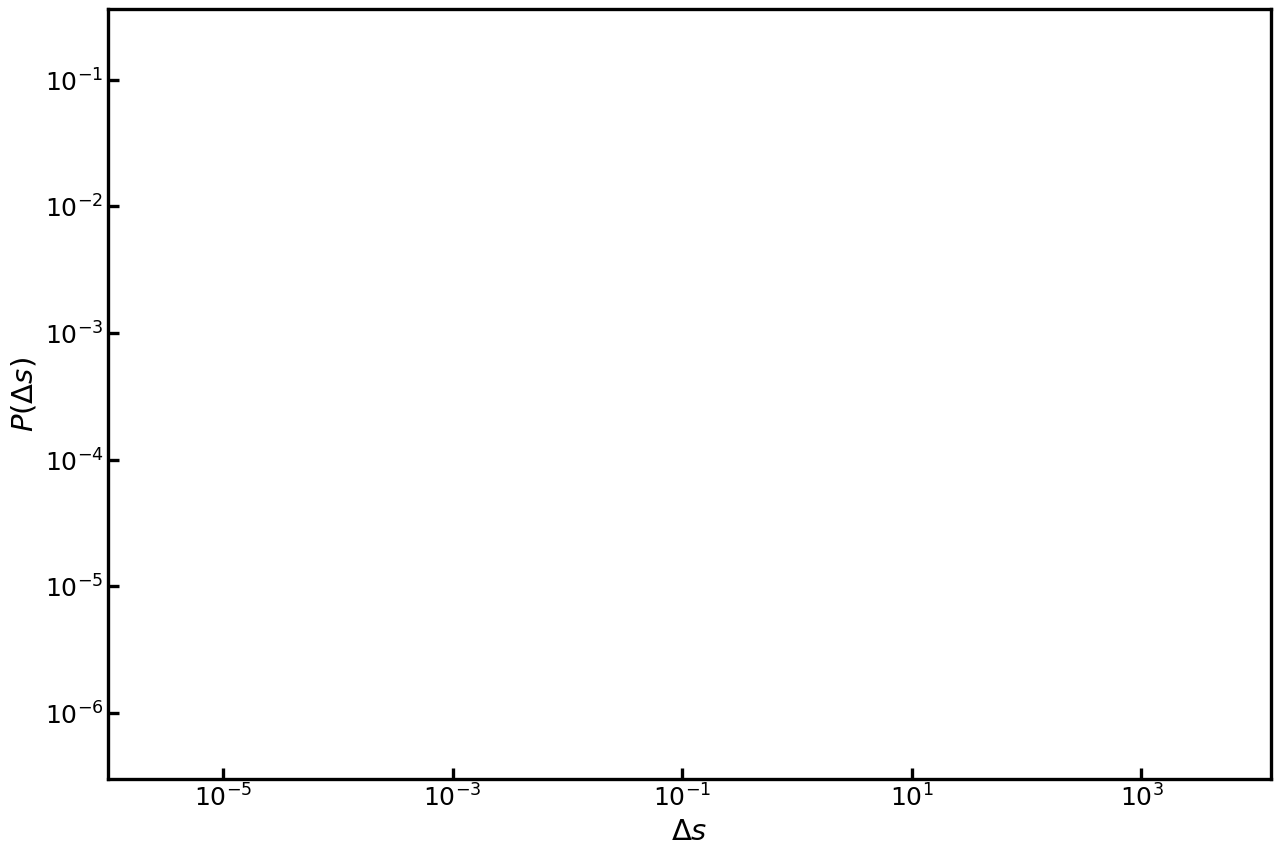

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Configuração de cores e marcadores
color = ["#808080", "black", '#008000', "#00008B", "magenta", "darkgoldenrod"]
markers = ["o", "d", "^", "s", "D"]
labels_global = [rf"$\alpha_g$ = {i:.2f}" for i in alpha_g_v]
markersize = 13

# Criando a figura e o eixo único
fig, ax = plt.subplots(figsize=(15, 10))

# Configuração inicial dos eixos
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r"$P(\Delta s)$", size=21)
ax.set_xlabel(r"$\Delta s$", size=21)
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.yaxis.set_minor_locator(plt.NullLocator())

thickness_axes = 2.4
parts_of_graphic = ['top', 'bottom', 'left', 'right']
for k in parts_of_graphic:
    ax.spines[k].set_linewidth(thickness_axes)
ax.tick_params(which='major', width=thickness_axes, direction="in", length=8, labelsize=18)

# Criando objeto de plot (inicialmente vazio)
line, = ax.plot([], [], markers[0], color=color[2], markersize=markersize, markerfacecolor='none')

# Definição dos limites do gráfico com base nos dados disponíveis
ax.set_xlim([min(min(k) for k in k_1d_g), max(max(k) for k in k_1d_g)])
ax.set_ylim([min(min(pk) for pk in pk_1d_g), max(max(pk) for pk in pk_1d_g)])

# Função de atualização da animação
def update(i):
    """ Atualiza o gráfico para o índice i. """
    line.set_data(k_1d_g[i], pk_1d_g[i])
    line.set_marker(markers[i % len(markers)])  # Alterna marcadores
    line.set_color(color[i % len(color)])  # Alterna cores
    ax.set_title(labels_global[i], fontsize=22)  # Atualiza título
    return line,

# Criando a animação e garantindo que ela não seja deletada
ani = animation.FuncAnimation(fig, update, frames=len(alpha_g_v), interval=500, repeat=True)

# Garantindo que a animação não seja deletada antes da exibição
plt.show()

# Evita a remoção automática da animação
plt.rcParams['animation.html'] = 'jshtml'
ani  # Mantém referência ativa
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Configuração de cores e marcadores
color = ["#808080", "black", '#008000', "#00008B", "magenta", "darkgoldenrod"]
markers = ["o", "d", "^", "s", "D"]
labels_alpha_a = [rf"$\alpha_a$ = {i:.2f}" for i in alpha_a_v]
markersize = 13

# Criando a figura e o eixo único
fig, ax = plt.subplots(figsize=(15, 10))

# Configuração inicial dos eixos
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r"$P(\Delta s)$", size=21)
ax.set_xlabel(r"$\Delta s$", size=21)
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.yaxis.set_minor_locator(plt.NullLocator())

thickness_axes = 2.4
parts_of_graphic = ['top', 'bottom', 'left', 'right']
for k in parts_of_graphic:
    ax.spines[k].set_linewidth(thickness_axes)
ax.tick_params(which='major', width=thickness_axes, direction="in", length=8, labelsize=18)

# Criando objeto de plot (inicialmente vazio)
line, = ax.plot([], [], markers[0], color=color[2], markersize=markersize, markerfacecolor='none')

# Filtrando valores positivos para evitar problemas com escala logarítmica
k_values = [k for k_list in k_1d_a for k in k_list if k > 0]
pk_values = [pk for pk_list in pk_1d_a for pk in pk_list if pk > 0]

# Definição dos limites do gráfico garantindo que sejam positivos
ax.set_xlim([min(k_values), max(k_values)])
ax.set_ylim([min(pk_values), max(pk_values)])

# Função de atualização da animação
def update(i):
    """ Atualiza o gráfico para o índice i de alpha_a_v. """
    valid_k = np.array(k_1d_a[i])
    valid_pk = np.array(pk_1d_a[i])
    
    # Filtra apenas valores positivos para evitar problemas com escala logarítmica
    mask = (valid_k > 0) & (valid_pk > 0)
    valid_k, valid_pk = valid_k[mask], valid_pk[mask]

    line.set_data(valid_k, valid_pk)
    line.set_marker(markers[i % len(markers)])  # Alterna marcadores
    line.set_color(color[i % len(color)])  # Alterna cores
    ax.set_title(labels_alpha_a[i], fontsize=22)  # Atualiza título
    
    return line,

# Criando a animação
ani = animation.FuncAnimation(fig, update, frames=len(alpha_a_v), interval=500, repeat=True)

plt.show()

# Evita remoção automática da animação
plt.rcParams['animation.html'] = 'jshtml'
ani  # Mantém referência ativa
ani.save("../../results/distributions/anim_dist_alpha_g.html", writer="html")

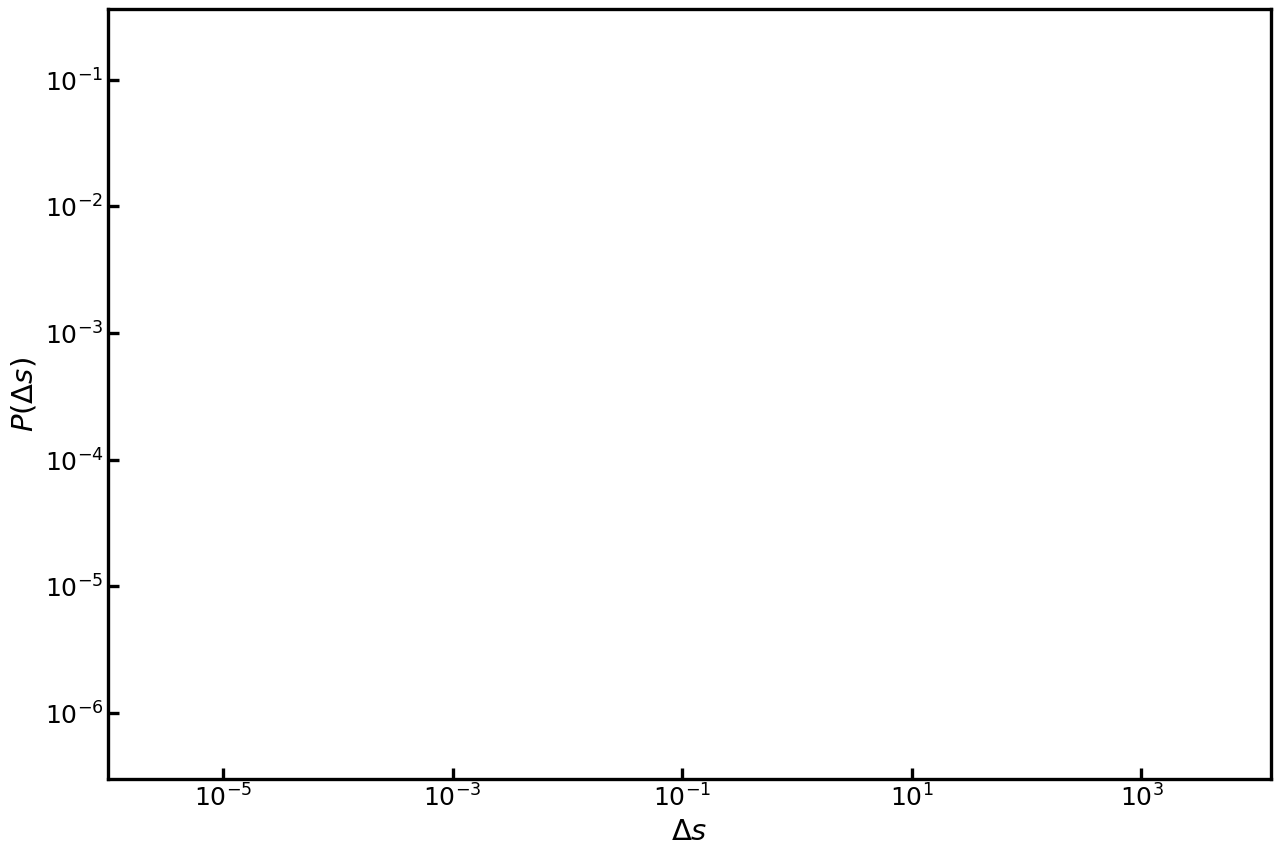

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Configuração de cores e marcadores
color = ["#808080", "black", '#008000', "#00008B", "magenta", "darkgoldenrod"]
markers = ["o", "d", "^", "s", "D"]
labels_alpha_a = [rf"$\alpha_a$ = {i:.2f}" for i in alpha_a_v]
markersize = 13

# Criando a figura e o eixo único
fig, ax = plt.subplots(figsize=(15, 10))

# Configuração inicial dos eixos
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r"$P(\Delta s)$", size=21)
ax.set_xlabel(r"$\Delta s$", size=21)
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.yaxis.set_minor_locator(plt.NullLocator())

thickness_axes = 2.4
parts_of_graphic = ['top', 'bottom', 'left', 'right']
for k in parts_of_graphic:
    ax.spines[k].set_linewidth(thickness_axes)
ax.tick_params(which='major', width=thickness_axes, direction="in", length=8, labelsize=18)

# Criando objeto de plot (inicialmente vazio)
line, = ax.plot([], [], markers[0], color=color[2], markersize=markersize, markerfacecolor='none')

# Filtrando valores positivos para evitar problemas com escala logarítmica
k_values = [k for k_list in k_1d_a for k in k_list if k > 0]
pk_values = [pk for pk_list in pk_1d_a for pk in pk_list if pk > 0]

# Definição dos limites do gráfico garantindo que sejam positivos
ax.set_xlim([min(k_values), max(k_values)])
ax.set_ylim([min(pk_values), max(pk_values)])

# Função de atualização da animação
def update(i):
    """ Atualiza o gráfico para o índice i de alpha_a_v. """
    valid_k = np.array(k_1d_a[i])
    valid_pk = np.array(pk_1d_a[i])
    
    # Filtra apenas valores positivos para evitar problemas com escala logarítmica
    mask = (valid_k > 0) & (valid_pk > 0)
    valid_k, valid_pk = valid_k[mask], valid_pk[mask]

    line.set_data(valid_k, valid_pk)
    line.set_marker(markers[i % len(markers)])  # Alterna marcadores
    line.set_color(color[i % len(color)])  # Alterna cores
    ax.set_title(labels_alpha_a[i], fontsize=22)  # Atualiza título
    
    return line,

# Criando a animação
ani = animation.FuncAnimation(fig, update, frames=len(alpha_a_v), interval=500, repeat=True)

plt.show()

# Evita remoção automática da animação
plt.rcParams['animation.html'] = 'jshtml'
ani  # Mantém referência ativa
ani.save("../../results/distributions/anim_dist_alpha_a.html", writer="html")
